In [1]:
from sim_env import FixedSimEnv
from main import run_ehd
from copy import deepcopy
import pandas as pd
import numpy as np
from data_handlers import GTFSHandler, AVLHandler, bpf, write_sim_data, ODXHandler
from itertools import product
from constants import *
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from utils import plot_situation

In [2]:
env = FixedSimEnv()
unique_dates = env.link_times['date'].unique()
day = np.random.choice(unique_dates, replace=False)

# METHOD 2 DON'T RESET DATE
# np.random.seed(0)
next_obs, rew, done, info = env.reset(hist_date=day)
print(env.hist_date)

2022-12-01


In [3]:
env, info, n_steps = run_ehd(env, done, n_steps=0, debug=True)

----
Time 0 days 05:16:38
Headways: 0 days 00:07:38 -- 0 days 00:13:22
schedule: 0 days 05:20:00
0 days 05:16:38 < Departure < 0 days 05:25:00
Recommended 0 days 05:19:30 ---> 0 days 05:19:30


In [6]:
env, info, n_steps = run_ehd(env, done, n_steps=n_steps, debug=True)

----
Time 0 days 05:35:04
Headways: 0 days 00:23:04 -- 0 days 00:17:26
schedule: 0 days 05:39:00
0 days 05:35:04 < Departure < 0 days 05:44:00
Recommended 0 days 05:35:04 ---> 0 days 05:35:04


In [7]:
full_info = env.info_records[-1].copy()
full_info = full_info[full_info['active']==1]

In [8]:
full_info

,time,route_id,id,status,status_desc,next_event,next_event_t,t_until_next,stop_id,stop_sequence,stop_lat,stop_lon,direction,trip_id,active,t_since_last,pax_load,trip_sequence,nr_step
0,20104.490769,81,652000002769,3,active - between stops,arrive at stop,20126.012201,21.521432,3760,35,41.968672,-87.679350,East,6279020,1,56.478568,0,1,332
1,20104.490769,81,652000002734,3,active - between stops,arrive at stop,20120.904777,16.414008,3745,21,41.968291,-87.715920,East,47219020,1,127.585992,0,2,332
2,20104.490769,81,652000002773,3,active - between stops,arrive at stop,20115.601246,11.110477,3729,5,41.967838,-87.755146,East,19619020,1,7.889523,0,3,332
17,20104.490769,91,652000002631,3,active - between stops,arrive at stop,20122.531115,18.040346,9591,42,41.905617,-87.775552,South,11565020,1,8.959654,0,1,332
28,20104.490769,92,652000002657,3,active - between stops,arrive at stop,20108.916251,4.425482,4788,40,41.976066,-87.674947,East,33787020,1,24.574518,1,1,332
29,20104.490769,92,652000002658,3,active - between stops,arrive at stop,20108.834254,4.343485,4765,19,41.975505,-87.724697,East,10757020,1,24.656515,2,2,332


In [10]:
stops = pd.read_csv('data/sim_in/stops.csv', dtype={'route_id':str})

3 5
3 5
3 4


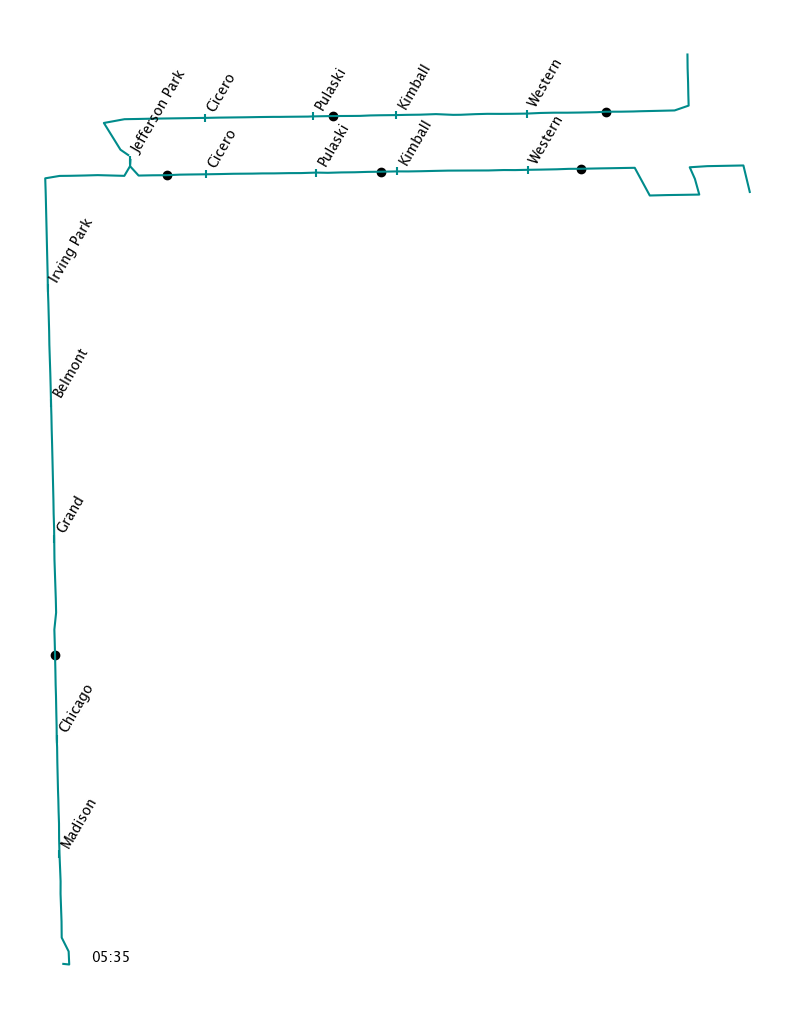

In [22]:
plot_situation(full_info, stops, env.hist_date)